# Spike Train Analysis: Exercise 0 - Visualizing Spike Trains

This tutorial covers the following topics:

* Introduction to NEO and Elephant
* Computing ISI distribution and PSTH of spike trains using Elephant functions

## NEO: representing electrophysiology data in Python

<img src="images/neo_logo.png" alt="Neo Logo" width="800"/>

|||
|--:|---|
|Homepage|[http://neuralensemble.org/neo](http://neuralensemble.org/neo)  |
|GitHub|[https://github.com/NeuralEnsemble/python-neo](https://github.com/NeuralEnsemble/python-neo)|
|Documentation|[https://neo.readthedocs.io/en/latest/](https://neo.readthedocs.io/en/latest/)|
|Bug reports|[https://github.com/NeuralEnsemble/python-neo/issues](https://github.com/NeuralEnsemble/python-neo/issues) |
|Python Package Index (PyPI)|[https://pypi.org/project/neo/](https://pypi.org/project/neo/) |

NEO provides a collection of useful Python class objects that are designed specifically for storing electrophysiology recording data.

The schematic below illustrates the NEO data object model.

![Structure](images/base_schematic.png)

## Elephant: data processing and analysis

![Elephant](images/elephant_logo.png)

|||
|--:|---|
|Homepage|[http://python-elephant.org](http://python-elephant.org)  |
|GitHub|[https://github.com/NeuralEnsemble/elephant](https://github.com/NeuralEnsemble/elephant)|
|Documentation|[https://elephant.readthedocs.io/en/stable/](https://elephant.readthedocs.io/en/stable/)|
|Bug reports|[https://github.com/NeuralEnsemble/elephant/issues](https://github.com/NeuralEnsemble/elephant/issues) |
|Python Package Index (PyPI)|[https://pypi.org/project/elephant/](https://pypi.org/project/elephant/) |

Elephant, short for ELEctroPHysiology Analysis Toolkit, is an open-source library for the analysis of electrophysiology data in Python.
It depends on NEO as the backend for data representation. This means that many of Elephant functions take NEO data objects as input and return the results also as NEO data objects.

In [1]:
import numpy as np
import quantities as pq
import neo
import elephant.spike_train_generation as stgen
import elephant.statistics as stats
import matplotlib.pyplot as plt

## Task 1.1: generate and handle `neo.SpikeTrain` object

Let's first generate a `neo.SpikeTrain` object and play around with it, to get used to handling NEO data objects.

To generate a spike train data, we use here an elephant function `elephant.spike_train_generation.StationaryPoissonProcess()`, which generates a random spike train as a realization of a stationary Poisson process with a given rate. 

In [2]:
# Generate a Poisson spike train
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 1000. * pq.ms

spiketrain = stgen.StationaryPoissonProcess(rate, t_start, t_stop).generate_spiketrain()

In [3]:
spiketrain

SpikeTrain containing 7 spikes; units ms; datatype float64 
time: 0.0 ms to 1000.0 ms

In [4]:
# spike times
print(spiketrain.times)

[110.79693738 244.32981503 280.0937049  344.60708914 378.47823147
 460.62583834 522.49564963] ms


In [5]:
# spike times in the units of second
print(spiketrain.times.rescale('s'))

[0.11079694 0.24432982 0.2800937  0.34460709 0.37847823 0.46062584
 0.52249565] s


In [6]:
# spike times as a plain numpy array in the units of second
print(spiketrain.rescale('s').magnitude)

[0.11079694 0.24432982 0.2800937  0.34460709 0.37847823 0.46062584
 0.52249565]


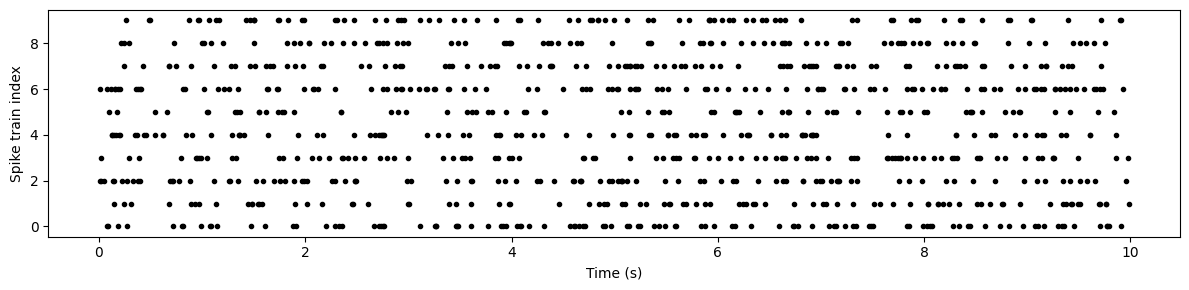

In [7]:
# Generate 10 Poisson spike trains and draw a dot display
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 10000. * pq.ms
num_spiketrains = 10

spiketrains = stgen.StationaryPoissonProcess(rate, t_start, t_stop).generate_n_spiketrains(num_spiketrains)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Spike train index")
for i, spiketrain in enumerate(spiketrains):
    spike_times = spiketrain.times.rescale('s').magnitude
    ax.plot(spike_times, np.ones_like(spike_times)*i, 'k.')

fig.tight_layout()
plt.show()

### Exercise
* Generate gamma spike trains by using `stgen.StationaryGammaProcess()` instead of `stgen.StationaryPoissonProcess()`, and draw the dot display. Note that you need to give 4 arguments to `stgen.StationaryGammaProcess()`: `rate`, `shape_factor`, `t_start`, and `t_stop`.
* Try using different values of `shape_factor` and see how the look of the dot display changes.

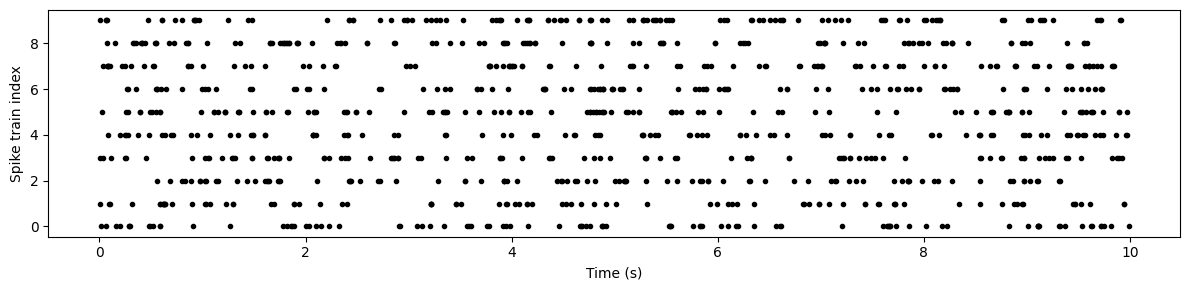

In [15]:
# Generate 10 Poisson spike trains and draw a dot display
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 10000. * pq.ms
num_spiketrains = 10
shape_factor = 0.5

spiketrains = stgen.StationaryGammaProcess(rate, shape_factor, t_start, t_stop).generate_n_spiketrains(num_spiketrains)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Spike train index")
for i, spiketrain in enumerate(spiketrains):
    spike_times = spiketrain.times.rescale('s').magnitude
    ax.plot(spike_times, np.ones_like(spike_times)*i, 'k.')

fig.tight_layout()
plt.show()

`shape_factor` determines the density of the spike trains. When the variable has a smaller value it is more sparse, but if the value is larger then there are more events observerd.

## Task 1.2: analyze spike trains using Elephant functions

You can easily perform various analysis on spike trains by applying Elephant functions to `neo.SpikeTrain` objects.

In [16]:
# Generate again 10 Poisson spike trains
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 10000. * pq.ms
num_spiketrains = 10

spiketrains = stgen.StationaryPoissonProcess(rate, t_start, t_stop).generate_n_spiketrains(num_spiketrains)

# Compute the mean firing rates of the spike trains
mean_rates = []
for spiketrain in spiketrains:
    mean_rates.append(stats.mean_firing_rate(spiketrain).rescale('Hz'))

print(mean_rates)

[array(8.5) * Hz, array(11.9) * Hz, array(9.7) * Hz, array(10.6) * Hz, array(9.4) * Hz, array(11.6) * Hz, array(10.3) * Hz, array(9.9) * Hz, array(11.) * Hz, array(10.7) * Hz]


In [17]:
# Estimate the instantaneous firing rates of the spike trains
inst_rates = []
for spiketrain in spiketrains:
    inst_rates.append(stats.instantaneous_rate(spiketrain, sampling_period=1.*pq.ms))

inst_rates[0]

AnalogSignal with 1 channels of length 10000; units Hz; datatype float64
annotations: {'t_stop': array(10000.) * ms,
  'kernel': {'type': 'GaussianKernel',
   'sigma': '1642.1340816452318 ms',
   'invert': False}}
sampling rate: 1.0 1/ms
time: 0.0 ms to 10000.0 ms

(10000, 1)
[0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03] ms


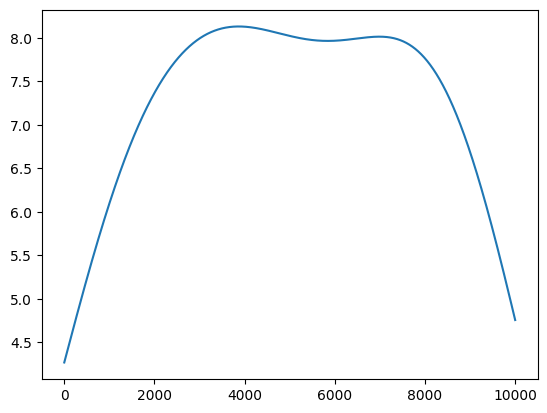

In [18]:
inst_rate = inst_rates[0]

# neo.AnalogSignal is always a 2-dimensional array: the first dimension is for time, and the second is for channels
print(inst_rate.shape)

# the time stamps can be obtained as `times` property of the object
print(inst_rate.times)

# thus, plotting the analog signal as a function of time is as easy as...
plt.plot(inst_rate.times, inst_rate) 
plt.show()

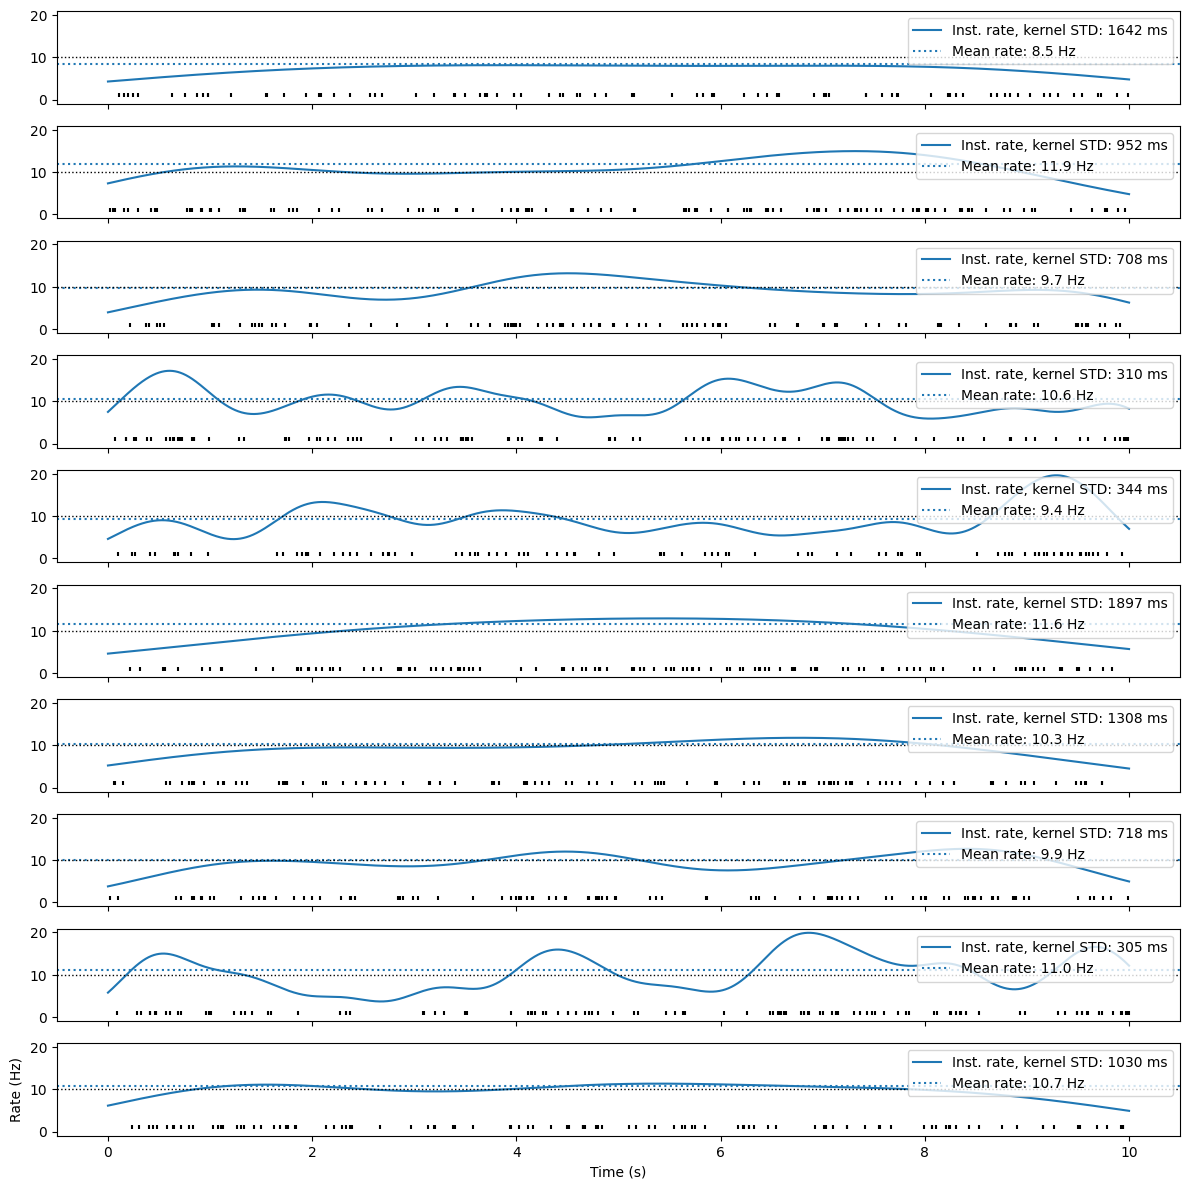

In [22]:
# Plot the above results separately for each spike train
fig, axes = plt.subplots(len(spiketrains), 1, figsize=(12, 12), sharex='all', sharey='all')
axes[-1].set_xlabel("Time (s)")
axes[-1].set_ylabel("Rate (Hz)")
for i, (spiketrain, mean_rate, inst_rate) in enumerate(zip(spiketrains, mean_rates, inst_rates)):
    ax = axes[i]
    ax.eventplot(spiketrain.times.rescale('s').magnitude, color='k')
    xs = inst_rate.times.rescale('s').magnitude
    ys = inst_rate.rescale('Hz').magnitude.flatten()
    sigma = float(inst_rate.annotations['kernel']['sigma'].split(' ')[0])
    ax.plot(xs, ys, color="C0", label=f"Inst. rate, kernel STD: {sigma:.0f} ms")
    
    ax.axhline(mean_rate, ls=':', color='C0', label=f"Mean rate: {mean_rate.rescale('Hz').magnitude:.1f} Hz")
    ax.axhline(rate, lw=1, ls=':', color='k')
    ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

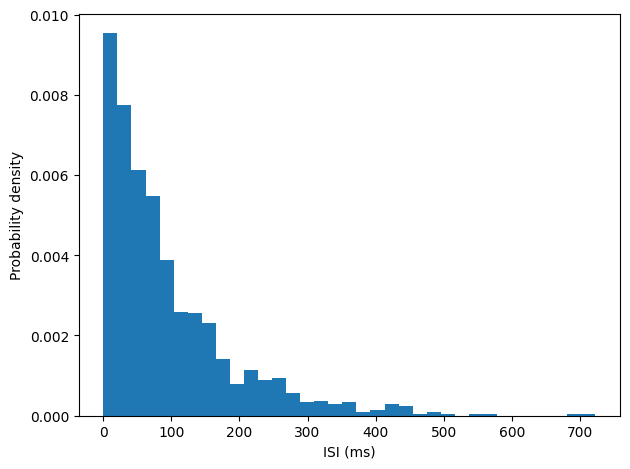

In [23]:
# Compute ISIs of the spike trains
isis = []
for spiketrain in spiketrains:
    isis.append(stats.isi(spiketrain).rescale('ms').magnitude)
isis = np.concatenate(isis)

# Draw the ISI distribution
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("ISI (ms)")
ax.set_ylabel("Probability density")
ax.hist(isis, bins='auto', density=True)

fig.tight_layout()
plt.show()

### Exercise
* Again, generate gamma spike trains by using `stgen.StationaryGammaProcess()` instead of `stgen.StationaryPoissonProcess()`, and draw the above plots.
* Use different values of `shape_factor` and see how the estimated instantaneous rate and the ISI distribution change depending on the regularity/burstiness of the spike trains.

In [49]:
# Generate 10 Poisson spike trains and draw a dot display
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 10000. * pq.ms
num_spiketrains = 10
shape_factor = 0.8

spiketrains = stgen.StationaryGammaProcess(rate, shape_factor, t_start, t_stop).generate_n_spiketrains(num_spiketrains)

# Compute the mean firing rates of the spike trains
mean_rates = []
for spiketrain in spiketrains:
    mean_rates.append(stats.mean_firing_rate(spiketrain).rescale('Hz'))

print(mean_rates)

[array(8.8) * Hz, array(10.7) * Hz, array(11.5) * Hz, array(8.6) * Hz, array(8.5) * Hz, array(8.9) * Hz, array(9.7) * Hz, array(9.3) * Hz, array(9.6) * Hz, array(9.4) * Hz]


In [50]:
# Estimate the instantaneous firing rates of the spike trains
inst_rates = []
for spiketrain in spiketrains:
    inst_rates.append(stats.instantaneous_rate(spiketrain, sampling_period=1.*pq.ms))

inst_rates[0]

AnalogSignal with 1 channels of length 10000; units Hz; datatype float64
annotations: {'t_stop': array(10000.) * ms,
  'kernel': {'type': 'GaussianKernel',
   'sigma': '441.85425843855836 ms',
   'invert': False}}
sampling rate: 1.0 1/ms
time: 0.0 ms to 10000.0 ms

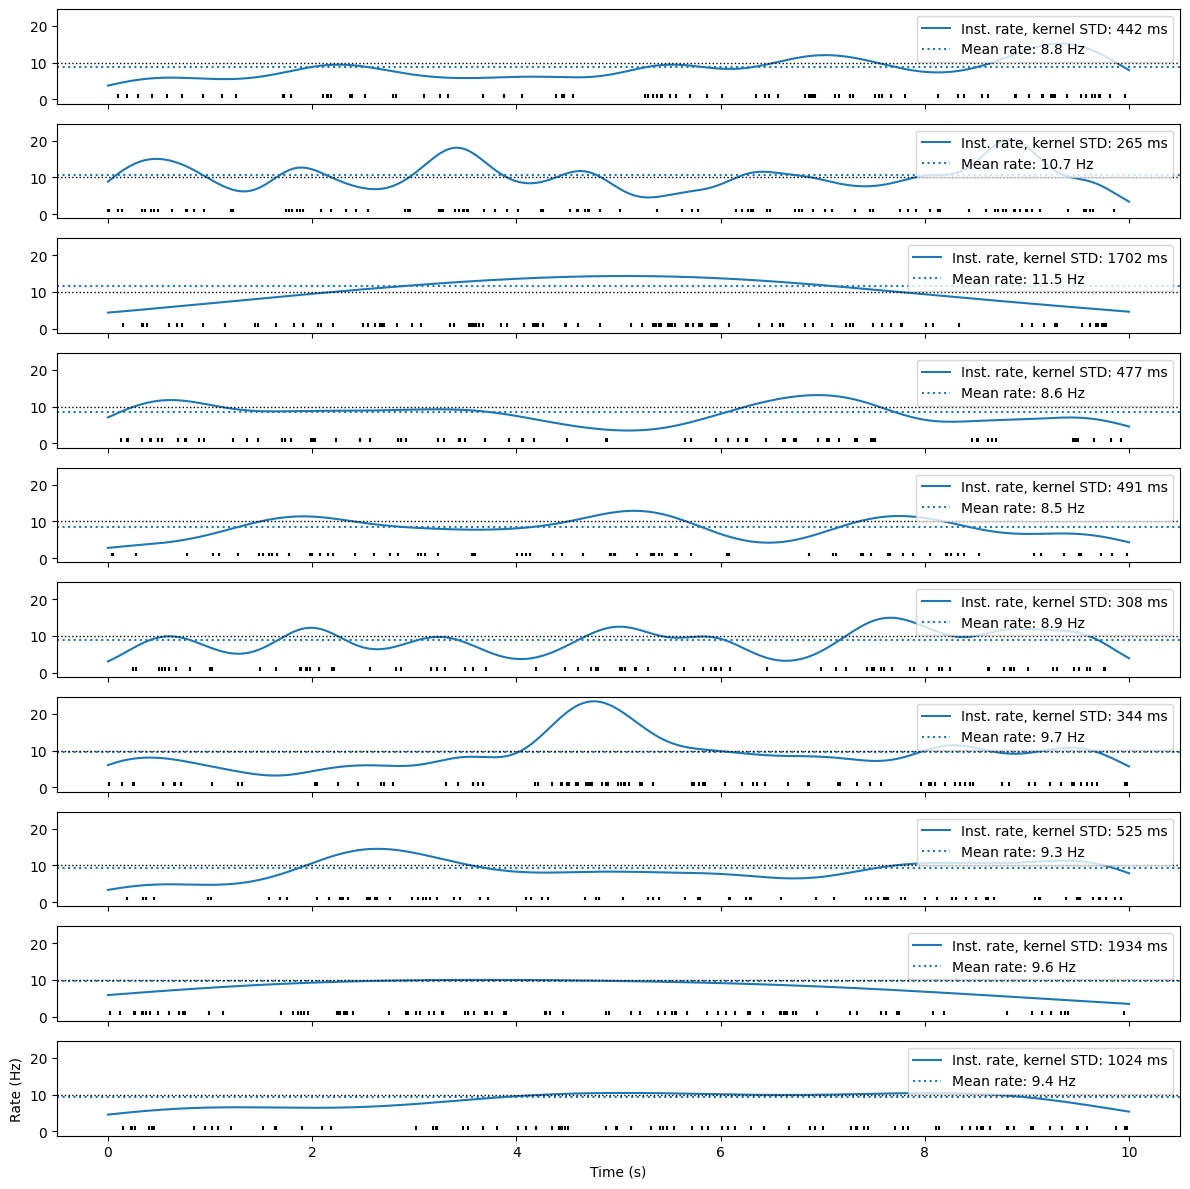

In [51]:
# Plot the above results separately for each spike train
fig, axes = plt.subplots(len(spiketrains), 1, figsize=(12, 12), sharex='all', sharey='all')
axes[-1].set_xlabel("Time (s)")
axes[-1].set_ylabel("Rate (Hz)")
for i, (spiketrain, mean_rate, inst_rate) in enumerate(zip(spiketrains, mean_rates, inst_rates)):
    ax = axes[i]
    ax.eventplot(spiketrain.times.rescale('s').magnitude, color='k')
    xs = inst_rate.times.rescale('s').magnitude
    ys = inst_rate.rescale('Hz').magnitude.flatten()
    sigma = float(inst_rate.annotations['kernel']['sigma'].split(' ')[0])
    ax.plot(xs, ys, color="C0", label=f"Inst. rate, kernel STD: {sigma:.0f} ms")
    
    ax.axhline(mean_rate, ls=':', color='C0', label=f"Mean rate: {mean_rate.rescale('Hz').magnitude:.1f} Hz")
    ax.axhline(rate, lw=1, ls=':', color='k')
    ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

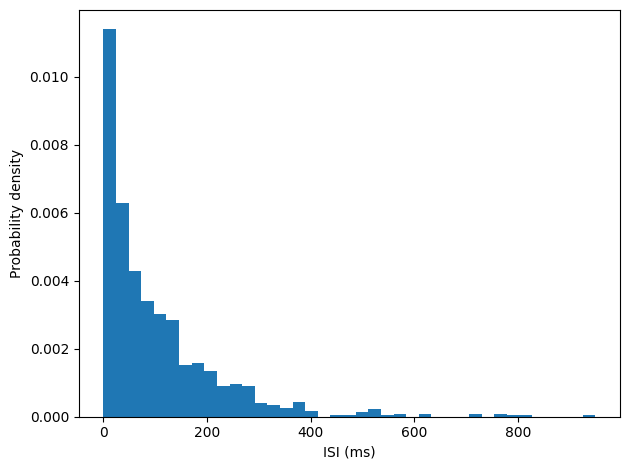

In [52]:
# Compute ISIs of the spike trains
isis = []
for spiketrain in spiketrains:
    isis.append(stats.isi(spiketrain).rescale('ms').magnitude)
isis = np.concatenate(isis)

# Draw the ISI distribution
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("ISI (ms)")
ax.set_ylabel("Probability density")
ax.hist(isis, bins='auto', density=True)

fig.tight_layout()
plt.show()

When using a smaller value for `shape_factor` the ISI distribution becomes more heavily skewed to the right. Furthermore, the skew for smaller values has higher values for ms.

## Task 1.3 generate nonstationary poisson spike trains and draw PSTH

You can genearte Poisson spike trains with time-varying firing rates using `stgen.NonStationaryPoissonProcess()`.
You need to specify the time-varing rate profile as an instance of `neo.AnalogSignal` object, as follows:

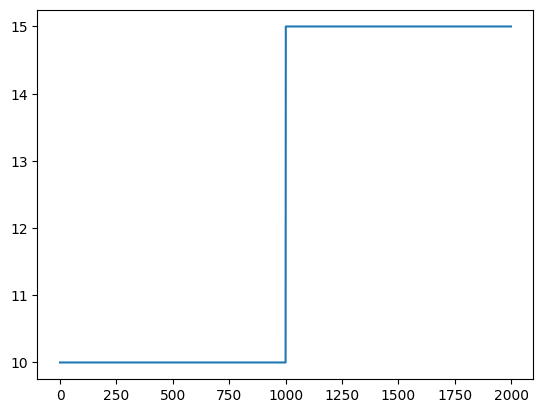

In [53]:
# Here we generate a rate profile with a stepwise change in the rate from 10 Hz to 15 Hz
rate1 = 10 * pq.Hz
rate2 = 15 * pq.Hz
sampling_period = 1 * pq.ms
t_start = 0 * pq.ms
t_stop = 2000 * pq.ms
t_rate_jump = 1000 * pq.ms

times = np.arange(t_start, t_stop, sampling_period)
rate_profile = np.ones_like(times) * rate1
rate_profile[times > t_rate_jump] = rate2
rate_signal = neo.AnalogSignal(rate_profile, t_start=t_start, sampling_period=sampling_period)

plt.plot(rate_signal.times, rate_signal)
plt.show()

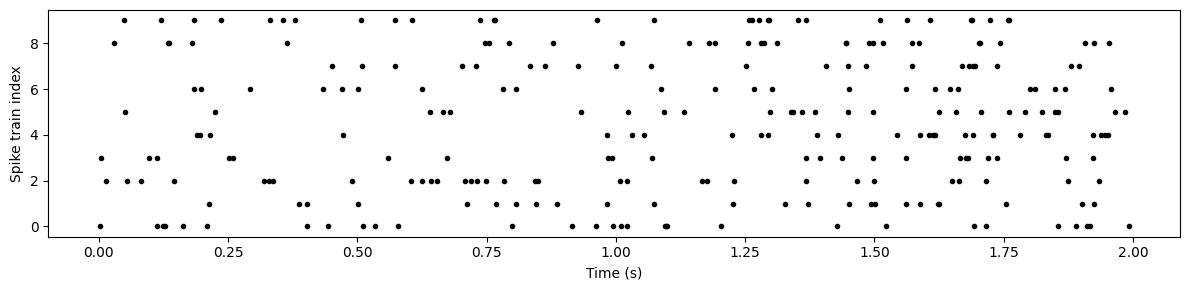

In [54]:
# Generate 10 Poisson spike trains with this rate profile
num_spiketrains = 10

spiketrains = stgen.NonStationaryPoissonProcess(rate_signal).generate_n_spiketrains(num_spiketrains)

# Check the generated spike trains in a dot display
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Spike train index")
for i, spiketrain in enumerate(spiketrains):
    spike_times = spiketrain.times.rescale('s').magnitude
    ax.plot(spike_times, np.ones_like(spike_times)*i, 'k.')

fig.tight_layout()
plt.show()

You can compute a peri-stimulus time histogram (PSTH) by giving a list of `neo.SpikeTrain` objects to the elephant function `stats.time_histogram()`.

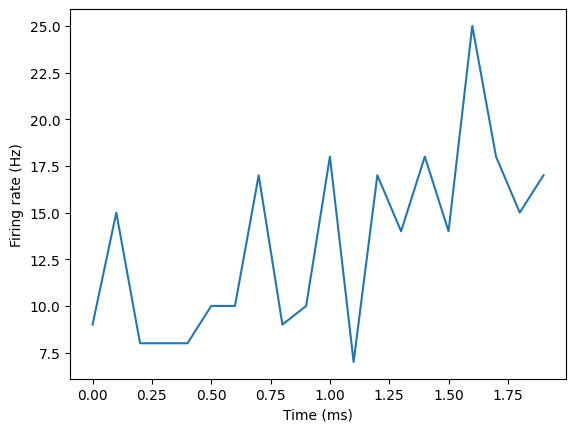

In [55]:
# Compute and plot the PSTH
bin_size = 100 * pq.ms

psth = stats.time_histogram(spiketrains, bin_size, output='rate')

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Firing rate (Hz)")
plt.plot(psth.times.rescale('s'), psth.rescale('Hz'))
plt.show()

### Exercise
* Change the values of `num_spiketrains` and `bin_size`, and see how these parameters affect the amount of fluctuations in the firing rate estimated by the PSTH.  
* Again, generate gamma spike trains by using `stgen.StationaryGammaProcess()` instead of `stgen.StationaryPoissonProcess()`, and draw the PSTH.
* Use different values of `shape_factor` and see how the effect of `num_spiketrains` and `bin_size` changes depending on the regularity/burstiness of the spike trains.

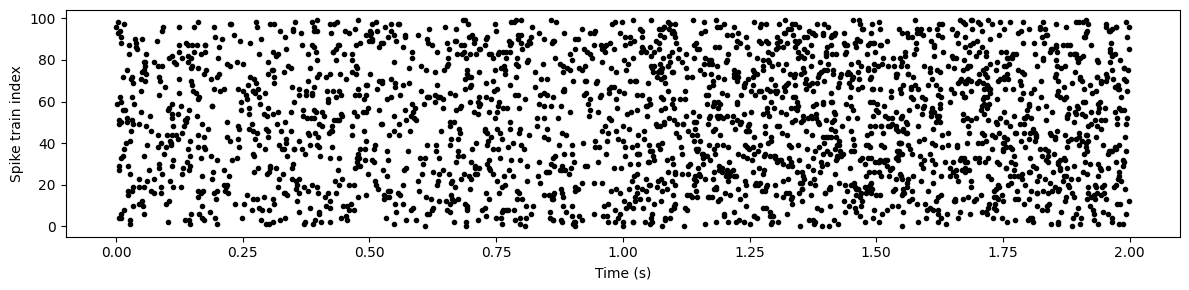

In [69]:
# Generate 10 Poisson spike trains with this rate profile
num_spiketrains = 100

spiketrains = stgen.NonStationaryPoissonProcess(rate_signal).generate_n_spiketrains(num_spiketrains)

# Check the generated spike trains in a dot display
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Spike train index")
for i, spiketrain in enumerate(spiketrains):
    spike_times = spiketrain.times.rescale('s').magnitude
    ax.plot(spike_times, np.ones_like(spike_times)*i, 'k.')

fig.tight_layout()
plt.show()

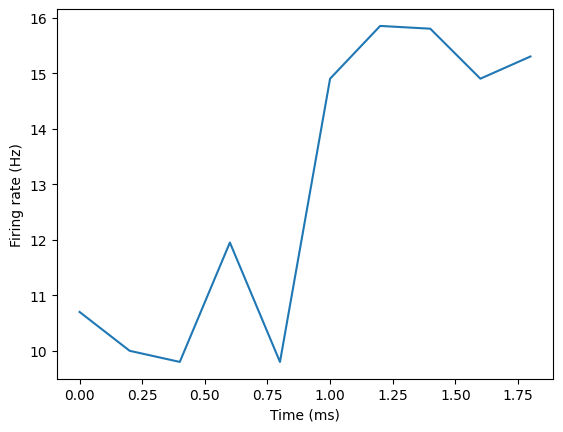

In [73]:
# Compute and plot the PSTH
bin_size = 200 * pq.ms

psth = stats.time_histogram(spiketrains, bin_size, output='rate')

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Firing rate (Hz)")
plt.plot(psth.times.rescale('s'), psth.rescale('Hz'))
plt.show()

As the `num_spiketrains` increases the firing rate value increases more obviously at around 1ms, such that there is a clear jump in the firing rate. As the `bin_size` increases the PSTH becomes more smoothed. 

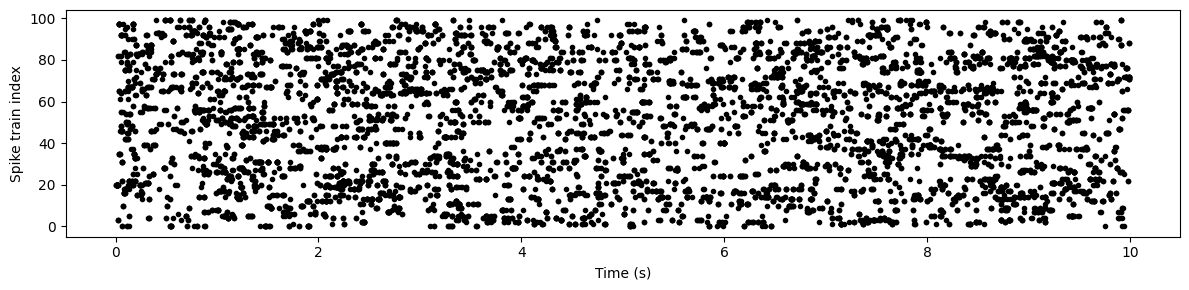

In [108]:
# Generate 10 Poisson spike trains with this rate profile
rate = 10. * pq.Hz
t_start = 0. * pq.ms
t_stop = 10000. * pq.ms
num_spiketrains = 100
shape_factor = 0.1

spiketrains = stgen.StationaryGammaProcess(rate, shape_factor, t_start, t_stop).generate_n_spiketrains(num_spiketrains)

# Check the generated spike trains in a dot display
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Spike train index")
for i, spiketrain in enumerate(spiketrains):
    spike_times = spiketrain.times.rescale('s').magnitude
    ax.plot(spike_times, np.ones_like(spike_times)*i, 'k.')

fig.tight_layout()
plt.show()

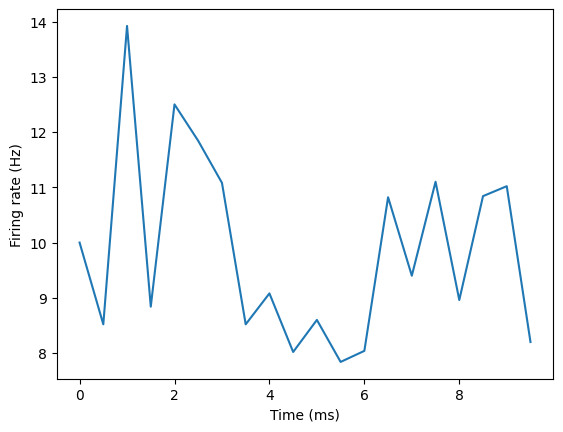

In [109]:
# Compute and plot the PSTH
bin_size = 500 * pq.ms

psth = stats.time_histogram(spiketrains, bin_size, output='rate')

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Firing rate (Hz)")
plt.plot(psth.times.rescale('s'), psth.rescale('Hz'))
plt.show()

Using more `num_spiketrains` results in a smaller range within the firing rate, due to averaging. Again, using a larger `bin_size` value results in more smoothing of the distributionn as there is less granularity. Increasing the `shape_factor` value also shirnks the range for the firing rate.